In [2]:
import numpy as np
from itertools import combinations
import os
import mdtraj as md
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.ndimage import gaussian_filter
import pandas as pd
import pytraj as pt
import re
import glob
import pickle 

# PyEmma
import pyemma
import pyemma.msm as msm
import pyemma.plots as mpl
import pyemma.coordinates as coor

In [2]:
df_THM = pickle.load(open("Hbonds_freq_THM.p", "rb"))#To load a file as a variable

In [3]:
df_THM = df_THM.tail(16)


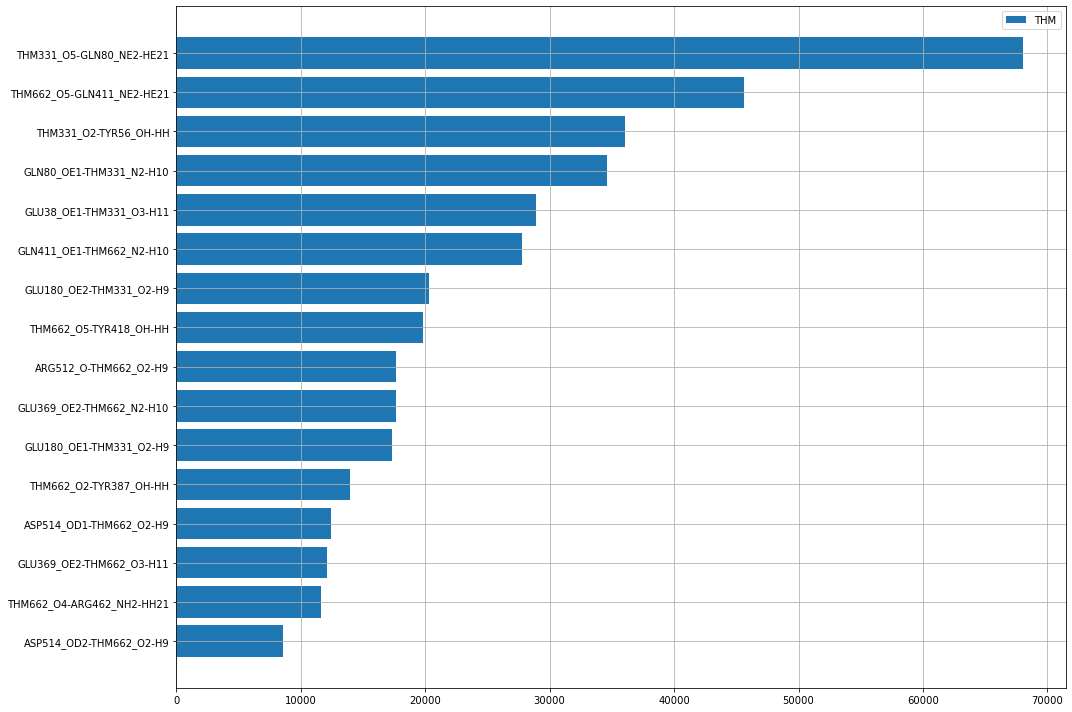

In [4]:
fig= plt.figure(figsize=(15,10))
plt.barh( df_THM['Hbonds'], df_THM['Freqs'], label="THM",)
plt.legend()
plt.yticks(range(len(df_THM['Hbonds'])), df_THM['Hbonds'])
plt.tight_layout()
plt.grid()

In [52]:
df_THM_ATP = pickle.load(open("Hbonds_freq_THM_ATP.p", "rb"))#To load a file as a variable

In [53]:
#df_THM_ATP = df_THM_ATP.tail(60)
df_THM_ATP

,Hbonds,Freqs
58,ARG118_NH2-THM332_O3-H11,1
13,GLU180_OE1-THM332_O3-H11,1
11,ARG513_O-THM664_O2-H9,1
49,ATP663_O3G-THM664_O3-H11,1
10,ASP515_OD1-THM664_O2-H9,1
20,GLU512_OE1-THM664_O3-H11,1
6,HID345_ND1-THM664_O2-H9,2
43,ARG118_NH1-THM332_O3-H11,2
52,THM664_O3-ARG509_NH2-HH21,2
34,THM664_O2-ARG463_NH2-HH22,2


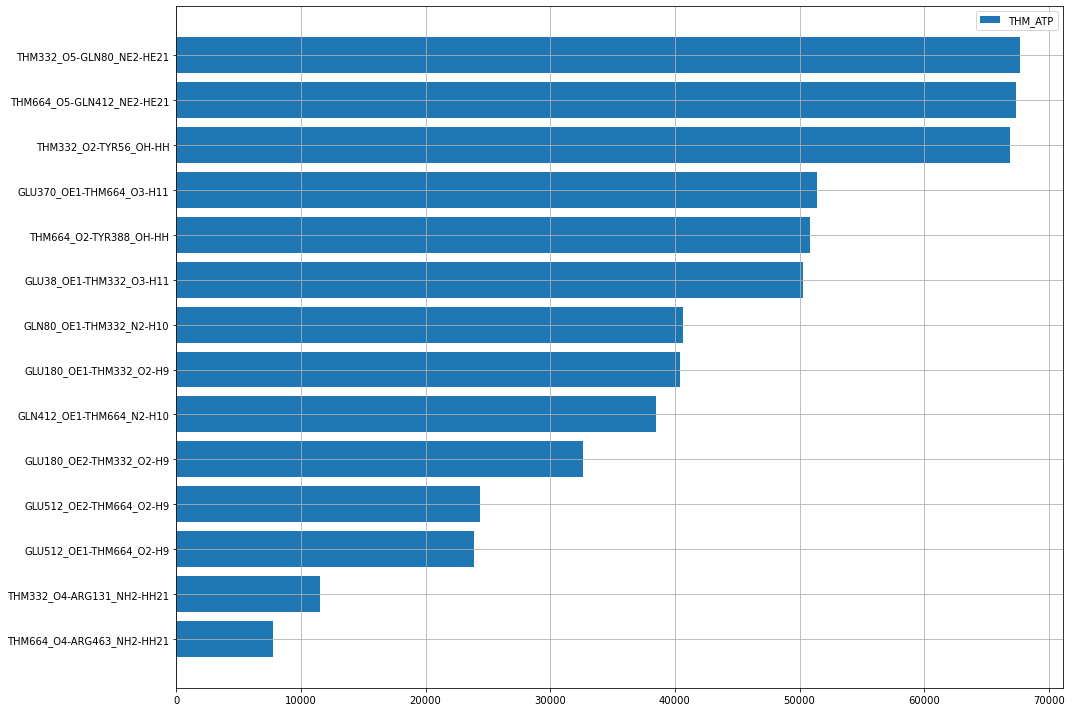

In [7]:
fig= plt.figure(figsize=(15,10))
plt.barh( df_THM_ATP['Hbonds'], df_THM_ATP['Freqs'], label="THM_ATP",)
plt.legend()
plt.yticks(range(len(df_THM_ATP['Hbonds'])), df_THM_ATP['Hbonds'])
plt.tight_layout()
plt.grid()

In [16]:
df_THM_ADP = pickle.load(open("Hbonds_freq_THM_ADP.p", "rb"))#To load a file as a variable

In [17]:
df_THM_ADP

,Hbonds,Freqs
66,TMP332_O5-ARG131_NH2-HH21,1
17,TMP664_O3-ARG509_NH1-HH12,1
13,TMP332_O3-TYR127_OH-HH,1
79,HID345_ND1-TMP664_O2-H8,1
21,TMP332_O2-ARG175_NH2-HH21,2
...,...,...
5,TMP664_O2-TYR388_OH-HH,37804
39,TMP332_O8-ARG177_NH2-HH21,39605
50,TMP664_O6-ARG450_NH1-HH12,41740
3,TMP332_O5-GLN80_NE2-HE21,61807


In [10]:
df_THM_ADP = df_THM_ADP.tail(32)
df_THM_ADP

,Hbonds,Freqs
78,TMP664_O7-ARG507_NH1-HH11,8702
7,TMP664_O2-HID345_ND1-HD1,9572
91,TMP664_O8-ARG509_NH1-HH12,10130
89,TMP664_O8-ARG509_NE-HE,10802
61,TMP664_O8-ARG507_NH1-HH11,10807
12,TMP664_O7-ARG509_NE-HE,12114
72,TMP332_O8-ARG177_NE-HE,13287
80,TMP664_O6-ARG450_NH2-HH22,13890
43,TMP664_O6-ARG509_NH1-HH12,14531
24,TMP664_O6-ARG509_NH2-HH22,15884


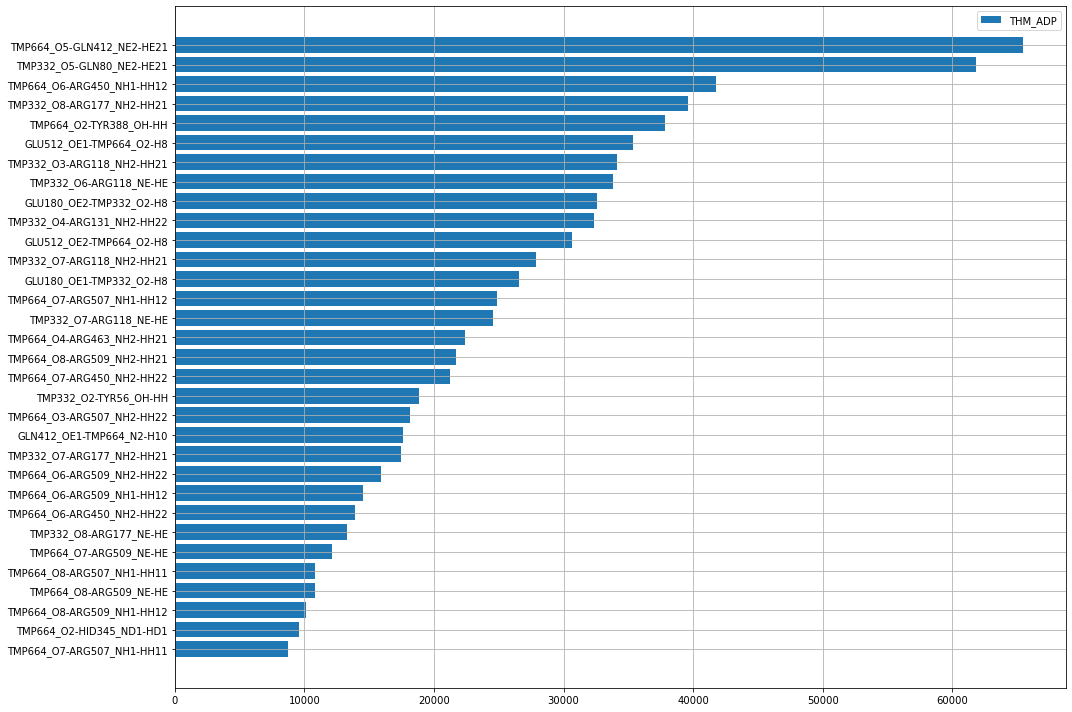

In [11]:
fig= plt.figure(figsize=(15,10))
plt.barh( df_THM_ADP['Hbonds'], df_THM_ADP['Freqs'], label="THM_ADP",)
plt.legend()
plt.yticks(range(len(df_THM_ADP['Hbonds'])), df_THM_ADP['Hbonds'])
plt.tight_layout()
plt.grid()

In [9]:
df_GCV = pickle.load(open("Hbonds_freq_GCV.p", "rb"))#To load a file as a variable

In [10]:
df_GCV

,Hbonds,Freqs
193,GA2331_O3-ARG44_NH1-HH12,1
224,GA2331_O4-MET15_N-H,1
74,ARG171_O-GA2331_N4-H9,1
72,GA2331_N3-THR57_OG1-HG1,1
227,GA2331_O3-HID60_ND1-HD1,1
...,...,...
280,GA2662_N2-ARG462_NH2-HH21,36221
348,GA2331_O4-ARG131_NE-HE,36883
264,GA2662_O4-ARG462_NE-HE,39214
185,GLN80_OE1-GA2331_N4-H9,46914


In [14]:
df_GCV = df_GCV.tail(60)

In [37]:
#df_GCV

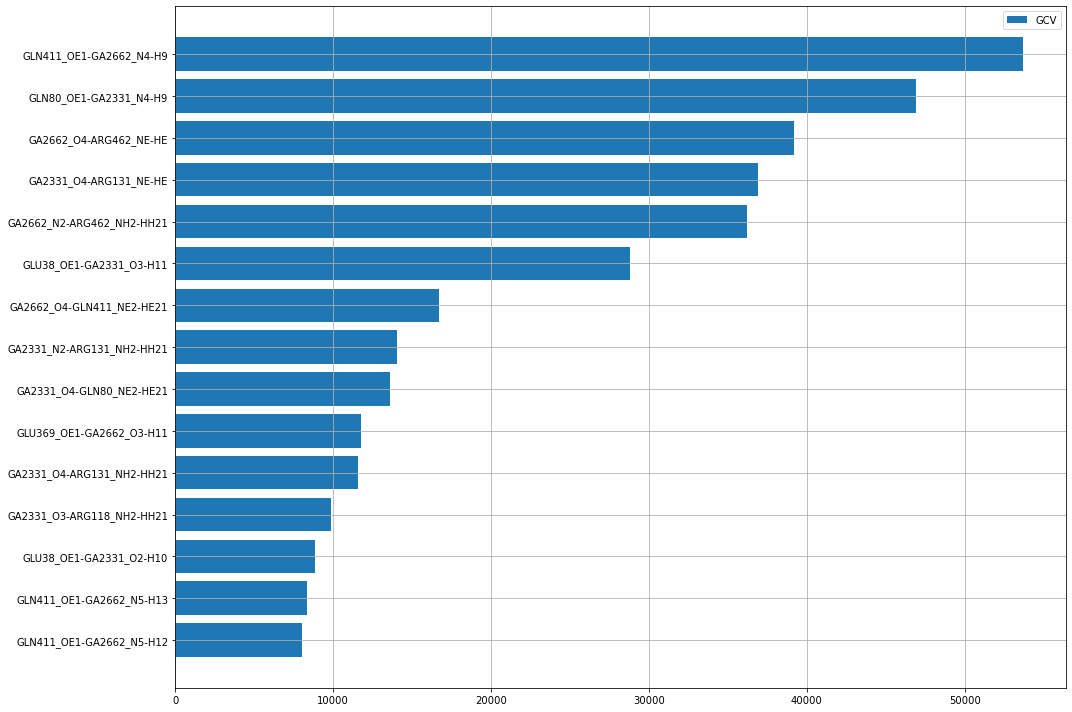

In [23]:
fig = plt.figure(figsize=(15,10))
plt.barh( df_GCV['Hbonds'], df_GCV['Freqs'], label="GCV",)
plt.legend()
plt.yticks(range(len(df_GCV['Hbonds'])), df_GCV['Hbonds'])
plt.tight_layout()
plt.grid()

In [58]:
df_GCV_ATP = pickle.load(open("Hbonds_freq_GCV_ATP.p", "rb"))#To load a file as a variable

In [61]:
#df_GCV_ATP.tail(60)

In [6]:
df_GCV_ATP = df_GCV_ATP.tail(16)

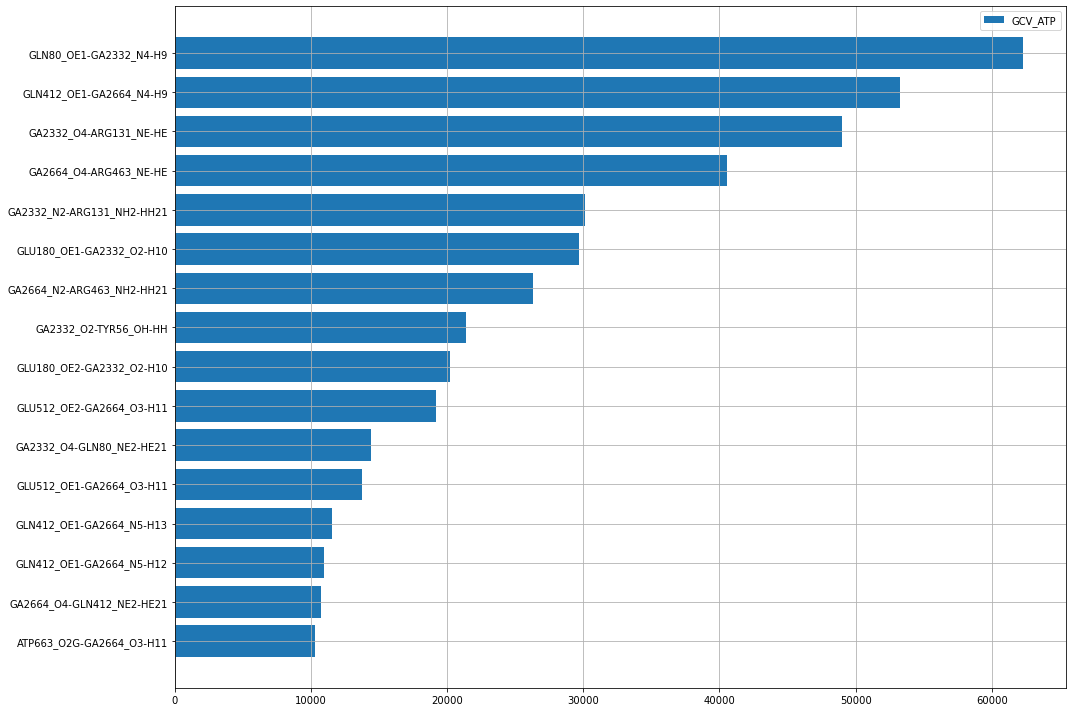

In [7]:
fig = plt.figure(figsize=(15,10))
plt.barh( df_GCV_ATP['Hbonds'], df_GCV_ATP['Freqs'], label="GCV_ATP",)
plt.legend()
plt.yticks(range(len(df_GCV_ATP['Hbonds'])), df_GCV_ATP['Hbonds'])
plt.tight_layout()
plt.grid()

In [69]:
df_GCV_ADP = pickle.load(open("Hbonds_freq_GCV_ADP.p", "rb"))#To load a file as a variable

In [70]:
df_GCV_ADP = df_GCV_ADP.tail(35)

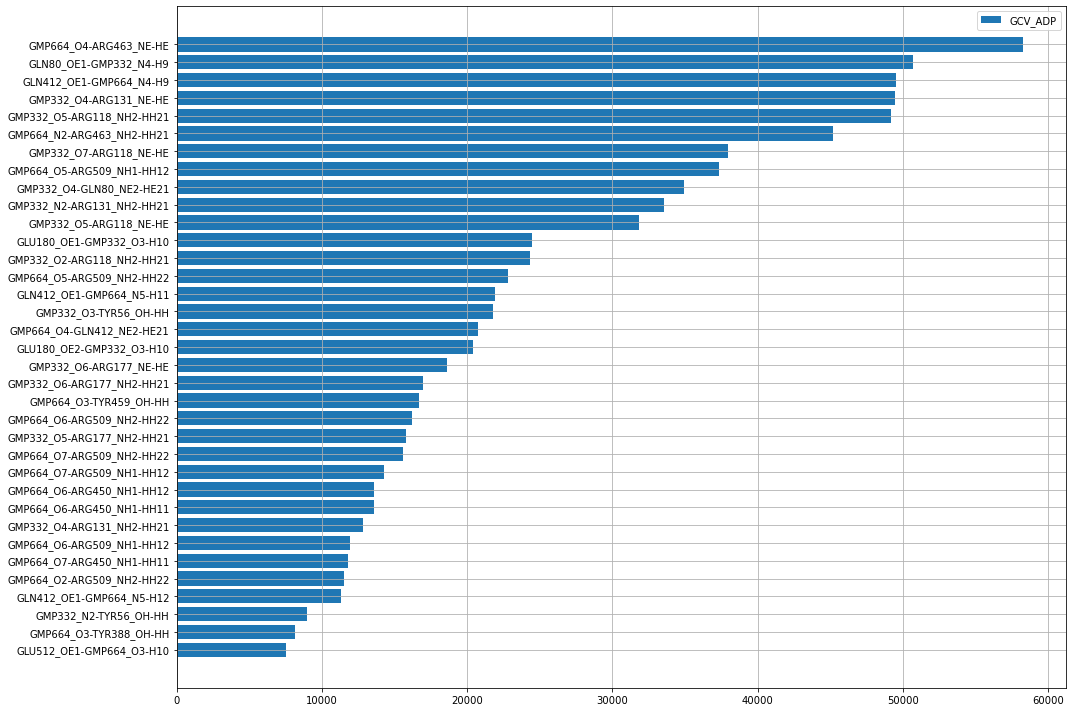

In [71]:
fig = plt.figure(figsize=(15,10))
plt.barh( df_GCV_ADP['Hbonds'], df_GCV_ADP['Freqs'], label="GCV_ADP",)
plt.legend()
plt.yticks(range(len(df_GCV_ADP['Hbonds'])), df_GCV_ADP['Hbonds'])
plt.tight_layout()
plt.grid()